In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [129]:
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [130]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


Text(0, 0.5, 'Price [dollars/$m^2$]')

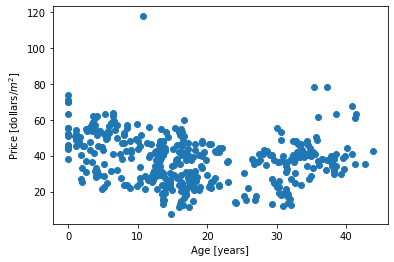

In [131]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')

In [132]:
%%capture
pip install ipywidgets

In [133]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [219]:
X = data[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
# X = data ['X2 house age']
y = data['Y house price of unit area']

vec = generateXvector(X)


In [180]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    if np.ndim(X.shape)!= 1:
    
        theta = np.ones(X.shape[1])
    else :
        theta = 1
    return theta

In [181]:
def transformar_dataframe(df):
    df = df.squeeze()
    
    for i in df.columns:
        df[i]=df.squeeze() 
    return df

In [214]:
def Multivariable_Linear_Regression(X,y,alpha, iterations):
    """ Find the multivarite regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
      
    errores = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    theta_val = []
    for i in range(iterations):
        h0 = X * theta
        gradients = ((1/m) * np.sum(h0.subtract(y,axis = 0)*X)) * alpha
        err = (1/m) * np.sum(h0.subtract(y,axis = 0))
        errores.append(err)
        theta_val.append(theta)
        theta = gradients
      
   
    return theta_val, errores

In [215]:
#normalizar
X = (X - np.min(X))/((np.max(X)-np.min (X)))


In [216]:
X.head()
# estas son nuestras variables más importantes para la regresión multiple


0    0.730594
1    0.445205
2    0.303653
3    0.303653
4    0.114155
Name: X2 house age, dtype: float64

In [234]:
N0 = 10
alpha = 0.25

thetas, errores =Multivariable_Linear_Regression(X,y,alpha,N0)

In [247]:
errores = np.array(errores)
len(errores [:,0].shape)
len(np.arange(1,N0))

9

In [283]:
def graficar(err, itera):
    err = np.array(err)
    plot1 = plt.subplot2grid((3, 3), (0, 0),colspan=2,rowspan=2)
    plot2 = plt.subplot2grid((3, 3), (0, 2), colspan=2)
    plot3 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
    
    
    plot1.plot(err[:,0],itera)
    plot1.set_title('Error theta 1')
    
    
    plot2.plot(err[:,1],itera)
    plot2.set_title('Error theta 2')
    
    
    plot3.plot(err[:,2],itera)
    plot3.set_title('Error theta 3')
    
    # Packing all the plots and displaying them
    plt.tight_layout()
    plt.show()

    

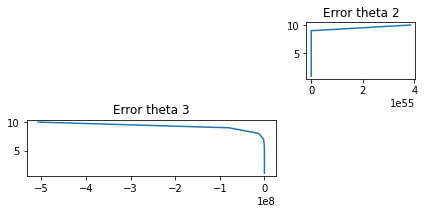

In [284]:
graficar(errores,np.arange(1,N0+1))

In [253]:
errores[:,0]

array([-2.02676329e+01, -9.10124312e+02, -9.95084690e+04, -1.10244516e+07,
       -1.22153546e+09, -1.35349181e+11, -1.49970277e+13, -1.66170816e+15,
       -1.84121418e+17, -2.04011134e+19])